# 第二章 基础二维图
## 2.8 三角图（或三相图：[ternary plots](http://en.wikipedia.org/wiki/Ternary_plot)）
一个新的绘图库： [python-ternary](https://github.com/marcharper/python-ternary)

In [5]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
import matplotlib.pyplot as plt
# 新增
import ternary_new as ternary
from ternary_new.helpers import project_point,project_sequence
import os

# 基本参数

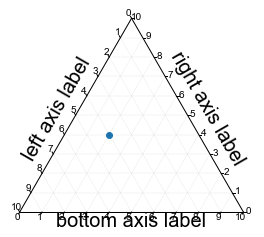

In [6]:
scale = 10

figure, tax = ternary.figure(scale=scale)
# 绘制边界
tax.boundary(linewidth=1)
# tax.gridlines(color='black',multiple=5)
tax.gridlines(color='black',multiple=1,linewidth=0.1)

# 坐标轴label
fontsize=20
tax.left_axis_label('left axis label',fontsize=fontsize)
tax.right_axis_label('right axis label',fontsize=fontsize)
tax.bottom_axis_label('bottom axis label',fontsize=fontsize)

tax.ticks(axis='lbr',linewidth=1)

plt.axis('scaled')
plt.axis('off')

# 可视化数据
point=[(2,4,4)]
tax.scatter(point)

ternary.plt.show()

### 案例精讲： [A colorized soil textural triangle](https://en.wikipedia.org/wiki/Ternary_plot#/media/File:SoilTexture_USDA.svg)

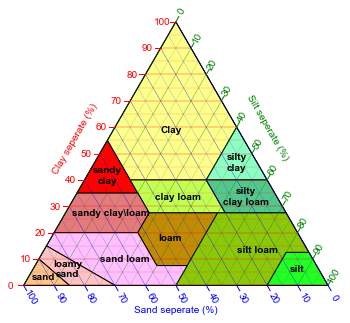

In [19]:
scale=100
fig, ax=ternary.figure(scale=scale)
ax2=ax.get_axes()
ternary.plt.axis('scaled')
ternary.plt.axis('off')

fig.set_size_inches(6,6)

# 1. 绘制边界，和网格
ax.boundary(linewidth=1.0)
ax.gridlines(multiple=10,linestyle='-',linewidth=0.2,
             left_kwargs={'color':'g'},right_kwargs={'color':'b'},horizontal_kwargs={'color':'r'})
ax.gridlines(multiple=5,linestyle='--',linewidth=0.2,
             left_kwargs={'color':'g'},right_kwargs={'color':'b'},horizontal_kwargs={'color':'r'})

# set ticks
ticklabels=ax.ticks(axis='lrb',multiple=10,offset=0.02,linewidth=1,axes_colors={'l':'r','r':'g','b':'b'},clockwise=True)
for tex in ticklabels['r']:
    tex.set_va('center')
    tex.set_ha('center')
    tex.set_rotation(60)
for tex in ticklabels['b']:
    tex.set_va('center')
    tex.set_ha('center')
    tex.set_rotation(-60)
    pos=tex.get_position()
    pos=np.array(pos)
    pos[1]+=2
    pos[0]-=0.5
    tex.set_position(pos)
# axis label
x,y=project_point((50,60,0))
ax2.text(x,y,'Silt seperate (%)',va='center',ha='center',rotation=-60,color=ticklabels['r'][0].get_color())
x,y=project_point((0, 50, 50))
ax2.text(x-8,y+5,'Clay seperate (%)',va='center',ha='center',rotation=60, color=ticklabels['l'][0].get_color())
x,y=project_point((50, 0, 50))
ax2.text(x,y-8,'Sand seperate (%)',va='center',ha='center',rotation=0, color=ticklabels['b'][0].get_color())

# fill plot
def fill_text(points,label,fc,fw='bold',alpha=1):
    x,y=project_sequence(points)
    ax2.fill(x,y,fc=fc,ec='black',alpha=alpha,zorder=2)
    ax2.text(np.mean(x),np.mean(y),label,va='center',ha='center',fontweight=fw)
# Clay
points=np.array([[0,100,0],[0,55,0],[15,40,45],[40,40,20],[40,60,0]])
fill_text(points,'Clay',(254/255.0,255/255.0,139/255.0))
# sandy clay
points=np.array([[0,55,0],[0,35,0],[20,35,50]])
fill_text(points,'sandy\nclay','red')
# clay loam
points=np.array([[15, 40,45],[27.5, 27.5, 45],[52.5, 27.5, 20],[40, 40,20]])
fill_text(points,'clay loam',(195/255.0,255/255.0,81/255.0))
# silty clay
points=np.array([[40,40,20],[40,60,0], [60, 40, 0]])
fill_text(points,'silty\nclay',(142/255.0,255/255.0,195/255.0))
# silty clay loam
points=np.array([[52.5, 27.5, 20],[40,40,20], [60, 40, 0], [72.5, 27.5, 0] ])
fill_text(points,'silty\nclay loam',(85/255.0,199/255.0,139/255.0))
# sandy clay loam
points=np.array([[0, 35, 65], [0, 20, 80], [27.5, 20, 52.5],[27.5, 27.5, 45], [20, 35, 65]])
fill_text(points,'sandy clay\loam',(228/255.0,122/255.0,124/255.0))
# loam
points=np.array([[27.5, 27.5, 45], [27.5, 20, 52.5], [40, 7.5, 52.5], [50, 7.5, 42.5], [50, 27.5, 22.5]])
fill_text(points,'loam',(193/255.0,140/255.0,5/255.0))
# silt loam
points=np.array([[50, 27.5, 22.5], [50, 0, 50], [80, 0, 20], [80, 12.5, 7.5], [87.5, 12.5, 0], [72.5, 27.5, 0]])
fill_text(points,'silt loam',(140/255.0,199/255.0,9/255.0))
# silt
points=np.array([[80, 0, 20], [80, 12.5, 7.5], [87.5, 12.5, 0], [100, 0, 0]])
fill_text(points,'silt',(33/255.0, 255/255.0, 37/255.0))
# sandy loam
points=np.array([[0, 20, 80], [27.5, 20, 52.5], [40, 7.5, 52.5], [50, 7.5, 42.5], [50, 0, 50], [30, 0, 70],[0, 15, 85]])
fill_text(points,'sand loam',(254/255.0, 192/255.0, 255/255.0))
# loamy sand
points=np.array([[0, 15, 85], [0, 10, 90], [15, 0, 85], [30, 0, 70]])
fill_text(points,'loamy\nsand',(254/255.0, 194/255.0, 195/255.0))
# sand
points=np.array([[0, 10, 90], [0, 0, 100],[15, 0, 85]])
fill_text(points,'sand',(253/255.0, 195/255.0, 139/255.0))
# ax.scatter([(20,30,50)],color='red',zorder=10)